# Stokes first and second problem

Demonstration of Stokes first and second problem.

Philipp Schlatter, 2022

Preliminaries:

In [9]:
%matplotlib notebook

# Maybe needed on Binder environments
#!pip install scipy     
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.animation
from scipy.special import erf
from IPython import display

## First Stokes problem: Impusively started plate

Consider a plate that is impulsively starting to move with velocity $V$ in the $x$-direction for $t>0$. Then,  we can use a similarity approach to solve for the velocity profile $u(y,t)$ above the plate. This solution will contain the so-called *error function* $\mathrm{erf}(z)$,

$$\mathrm{erf}(z) = \frac{2}{\sqrt{\pi}} \int_0^z e^{-q^2} \mathrm{d}q \ . $$

<IPython.core.display.Javascript object>


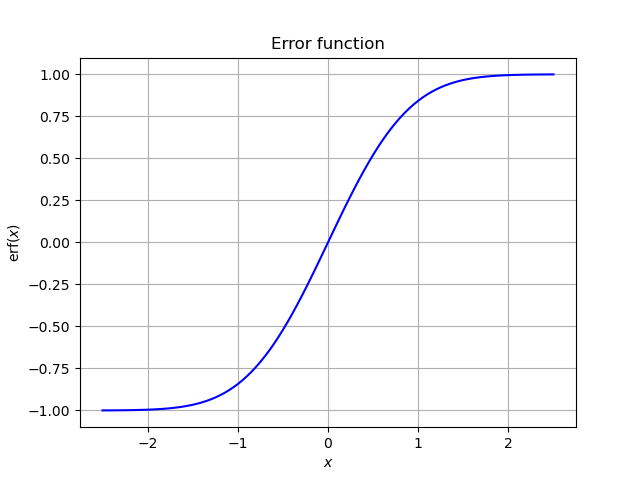

In [10]:
x=np.linspace(-2.5,2.5,101);
plt.figure()
plt.xlabel(f'$x$')
plt.ylabel(f'erf$(x)$')
plt.plot( x, erf(x),'b')
plt.grid()
plt.title('Error function')
plt.show()

With the (independent) similarity variable, 
$$ \eta =\frac{y}{\sqrt{\nu t}}\ , $$

we obtain the similarity solution $f(\eta) = u/V$

$$f(\eta) = 1 - \mathrm{erf}\left(\frac{\eta}{2}\right) \ .$$

Thus, the actual velocity profile is then given as

$$ u(y,t) = V \left[1 - \mathrm{erf}\left(\frac{y}{2\sqrt{\nu t}}\right) \right]\ . $$

The value $f(\eta)=0.01$ is obtained for $\eta\approx 3.64$.


<IPython.core.display.Javascript object>


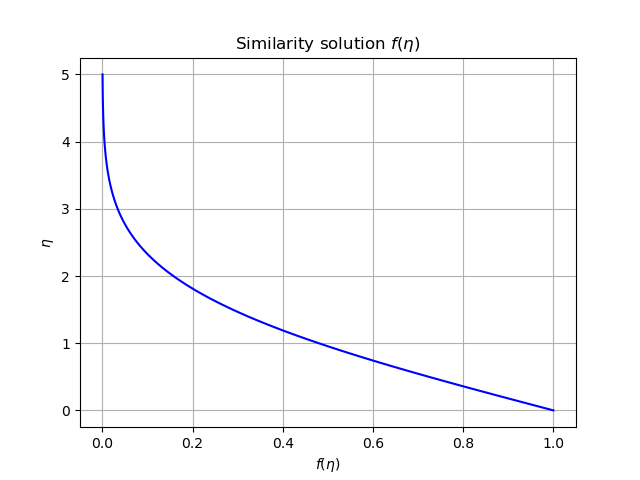

In [11]:
eta=np.linspace(0,5,101);
plt.figure()
plt.xlabel(f'$f(\eta)$')
plt.ylabel(f'$\eta$')
plt.plot( 1-erf(eta/2),eta,'b')
plt.grid()
plt.title('Similarity solution $f(\eta)$')
plt.show()

<IPython.core.display.Javascript object>


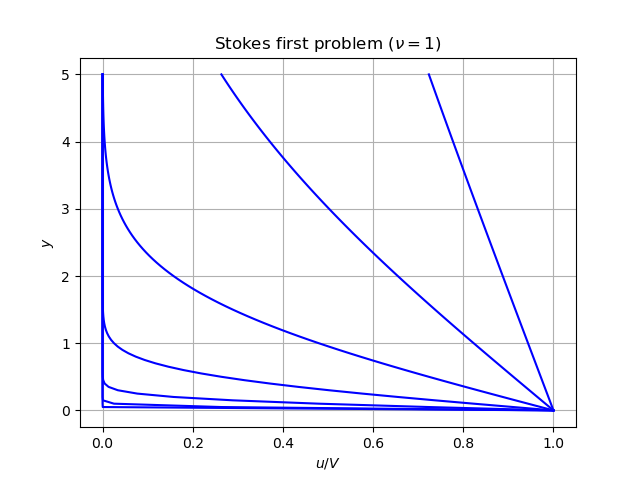

In [12]:
y=np.linspace(0,5,101);
plt.figure()
plt.xlabel(r'$u/V$')
plt.ylabel(r'$y$')
nu=1
u = lambda y,t : 1-erf(y/np.sqrt(nu*t)/2)

plt.plot( u(y,0.0001),y,'b')
plt.plot( u(y,0.001),y,'b')
plt.plot( u(y,0.01),y,'b')
plt.plot( u(y,0.1),y,'b')
plt.plot( u(y,1),y,'b')
plt.plot( u(y,10),y,'b')
plt.plot( u(y,100),y,'b')

plt.grid()
plt.title(r'Stokes first problem ($\nu=1$)')
plt.show()

<IPython.core.display.Javascript object>


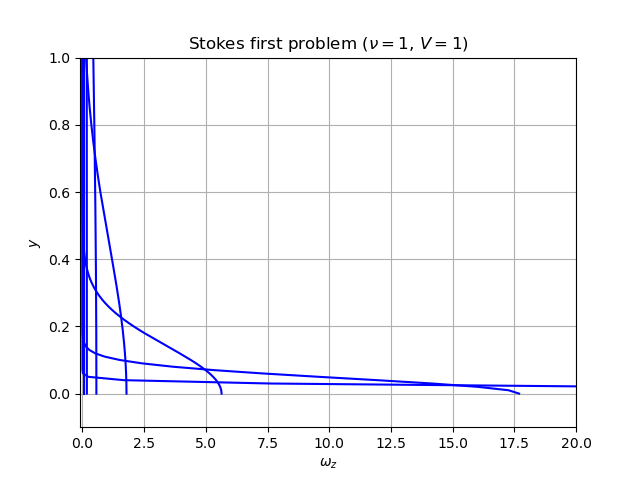

In [13]:
y=np.linspace(0,5,501);
plt.figure()
plt.xlabel(r'$\omega_z$')
plt.ylabel(r'$y$')
nu=1
u = lambda y,t : 1-erf(y/np.sqrt(nu*t)/2)

plt.plot( np.gradient(-u(y,0.0001),y),y,'b')
plt.plot( np.gradient(-u(y,0.001),y),y,'b')
plt.plot( np.gradient(-u(y,0.01),y),y,'b')
plt.plot( np.gradient(-u(y,0.1),y),y,'b')
plt.plot( np.gradient(-u(y,1),y),y,'b')
plt.plot( np.gradient(-u(y,10),y),y,'b')
plt.plot( np.gradient(-u(y,100),y),y,'b')

plt.grid()
plt.xlim(-0.1,20)
plt.ylim(-0.1,1)
plt.title(r'Stokes first problem ($\nu=1$, $V=1$)')
plt.show()

<IPython.core.display.Javascript object>


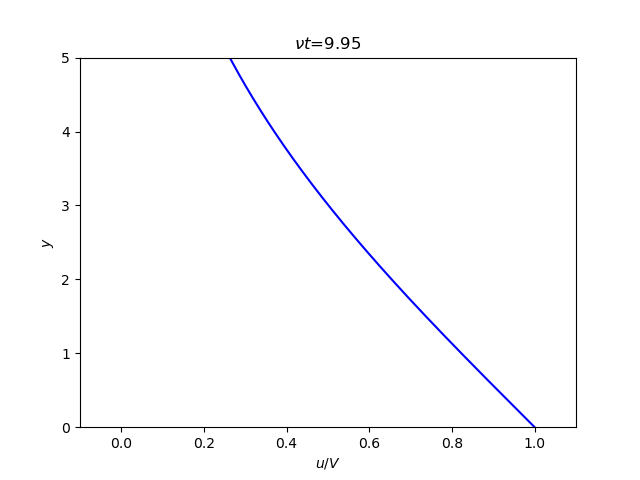

In [16]:
fig,ax = plt.subplots(1)
ell, = ax.plot([],[],color='b')
tmax=10
t=np.arange(0.05,tmax,tmax/200)

def init():
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0, 5])
    ax.set_xlabel(r'$u/V$')
    ax.set_ylabel(r'$y$') 
    
def animate(j):
    ell.set_data(u(y,t[j]),y)
    ax.set_title(rf'$ \nu t $={t[j]:.2f}')
    return ell,ax
                
ani=matplotlib.animation.FuncAnimation(fig, animate, frames=t.size, init_func=init, repeat=False,blit=True,interval=10)

In [17]:
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)

## Second Stokes problem: Oscillating plate

Let us assume a plate which moves with velocity $V \cos(\omega t)$ in the $x$-direction. Then, the velocity profile $u(y,t)$ is obtained as the solution to Stokes second problem as follows:

$$u(y,t) = V e^{-k y} \cos ( \omega t - k y) \ ,$$

with $k=\sqrt{\omega / (2\nu)}$. A non-dimensional form is then obtained as $u/V(k y, \omega t)$ and visualised with the following code:

<IPython.core.display.Javascript object>


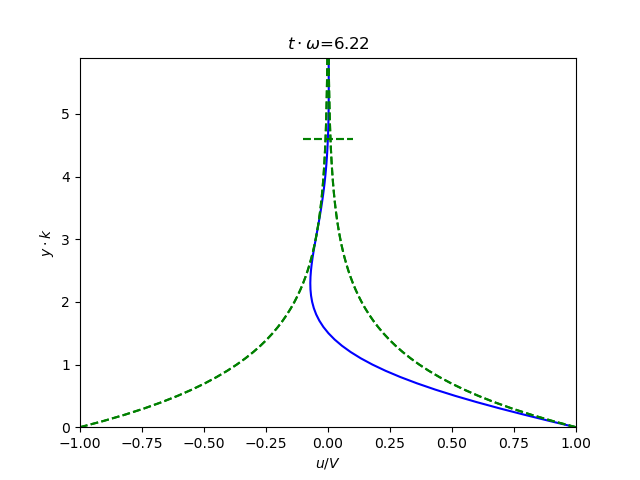

In [18]:
yk = np.arange(0,6,0.1)
dk = 4.6
tmax=2*np.pi # period
tom=np.arange(0,tmax,tmax/100)

u = lambda tom : np.exp(-yk)*np.cos(yk-tom);
um = np.exp(-yk);

fig,ax = plt.subplots(1)
ell, = ax.plot([],[],color='b')

def init():
    ax.set_xlim([-1, 1])
    ax.set_ylim([0, yk[-1]])
    ax.plot(um, yk,'g--')
    ax.plot(-um, yk,'g--')
    ax.plot([-0.1,0.1],[dk,dk],'g--')
    ax.set_xlabel(f'$u / V$')
    ax.set_ylabel(f'$y \cdot k$')    
    
def animate(j):
    ell.set_data(u(tom[j]),yk)
    ax.set_title(f'$t \cdot \omega$={tom[j]:.2f}')
    return ell,ax
                
ani=matplotlib.animation.FuncAnimation(fig, animate, frames=tom.size, init_func=init, repeat=False,blit=True,interval=10)

In [19]:
# convert to html5 video
# plt.rcParams['animation.ffmpeg_path'] = '/path_to_your/ffmpeg'
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)